In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman2.csv")


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(haberman.describe())

              Age     Op_Year  axil_nodes_det  Surv_status
count  306.000000  306.000000      306.000000   306.000000
mean    52.457516   62.852941        4.026144     1.264706
std     10.803452    3.249405        7.189654     0.441899
min     30.000000   58.000000        0.000000     1.000000
25%     44.000000   60.000000        0.000000     1.000000
50%     52.000000   63.000000        1.000000     1.000000
75%     60.750000   65.750000        4.000000     2.000000
max     83.000000   69.000000       52.000000     2.000000


The Dataset contains 50% people below the age of 52

In [4]:
print (haberman.shape)

(306, 4)


In [5]:
print (haberman.columns)

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [6]:
print(haberman.head())

   Age  Op_Year  axil_nodes_det  Surv_status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1


In [7]:
haberman["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

THUS IT IS A IMBALANCED DATASET

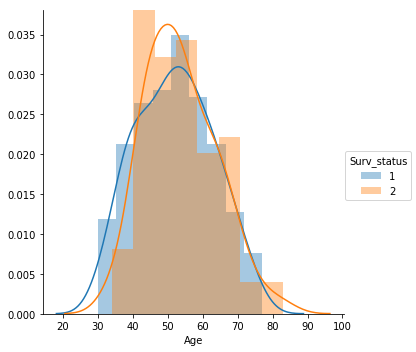

In [8]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

In [9]:
plt.savefig("image1.png")

<Figure size 432x288 with 0 Axes>

if age is less than 35 we can say that the patient can live 5 years or longer for sure.
if the age is between 35 and 40 ,we can say that the patient can life for more than 5 years with high probability
from 75 to 80 the patient will not live for more than 5 years
In other range of ages we can give only probalistic values and they are neither high nor low.

In [10]:
import numpy as np

In [11]:
print(np.arange(0,100,2))

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]


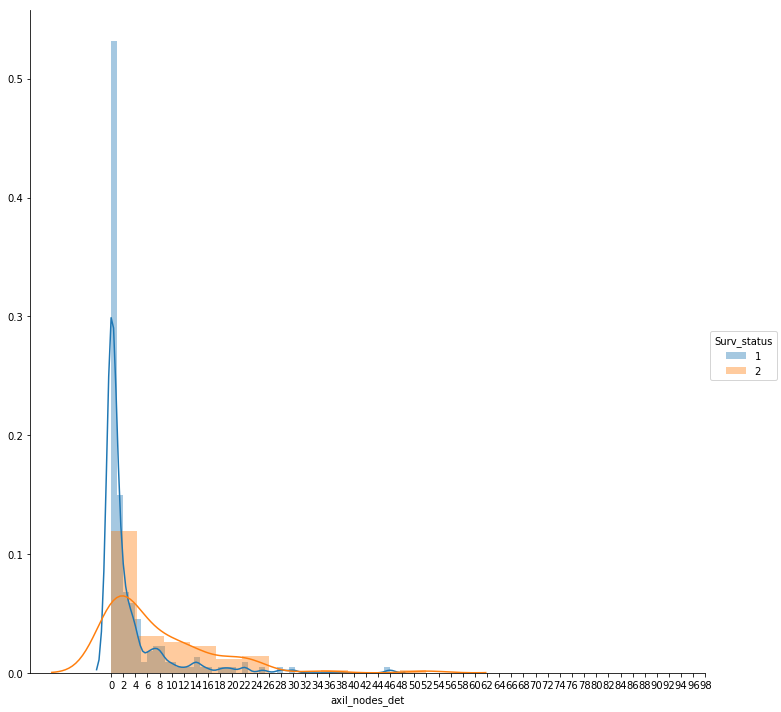

In [12]:
plt.close();
sns.FacetGrid(haberman, hue="Surv_status", size=10) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.xticks(np.arange(0, 100, 2))
plt.show();

As axil_nodes_det is in the range of 0-5,the patient will live for more than 5 years
once the it crossed 10,the patient may not live for mare than 5 years

   Age  Op_Year  axil_nodes_det  Surv_status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1
    Age  Op_Year  axil_nodes_det  Surv_status
7    34       59               0            2
8    34       66               9            2
24   38       69              21            2
34   39       66               0            2
43   41       60              23            2


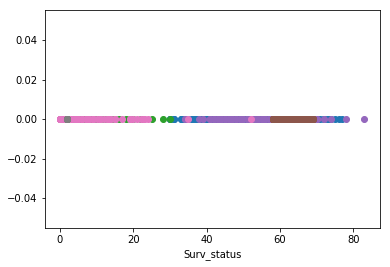

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman_1 = (haberman.loc[haberman["Surv_status"] == 1]);
haberman_2 = (haberman.loc[haberman["Surv_status"] == 2]);


plt.plot(haberman_1, np.zeros_like(haberman_1), 'o')
plt.plot(haberman_2, np.zeros_like(haberman_2), 'o')

print(haberman_1.head())
print(haberman_2.head())
plt.xlabel("Surv_status")
plt.ylabel("")
plt.show()


[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


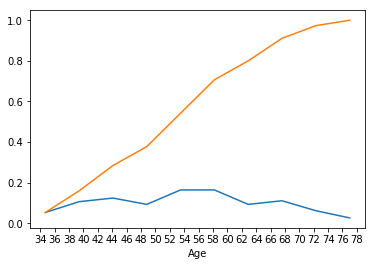

In [14]:
counts, bin_edges = np.histogram(haberman_1['Age'], bins=10, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xticks(np.arange(0, 100, 2))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age")
plt.ylabel("")



plt.show();

it is found that people with age between 53 and 58 have high probability of living for more than 5 years
and the pdf shows other details which can be easily seen

[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


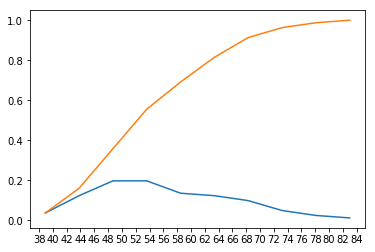

Text(0,0.5,'')

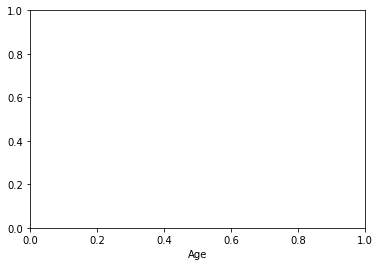

In [15]:
counts, bin_edges = np.histogram(haberman_2['Age'], bins=10, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xticks(np.arange(0, 100, 2))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()
plt.xlabel("Age")
plt.ylabel("")

as age increases after 54 the probability that dying within 5 years decreases.

In [16]:
print("\nMedians:")

print(np.median(haberman_1["Age"]))
print(np.median(haberman_2["Age"]))


print("\nQuantiles:")

print(np.percentile(haberman_1["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["Age"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")

print(np.percentile(haberman_1["Age"],90))
print(np.percentile(haberman_2["Age"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")

print(robust.mad(haberman_1["Age"]))
print(robust.mad(haberman_2["Age"]))


Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


In [17]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


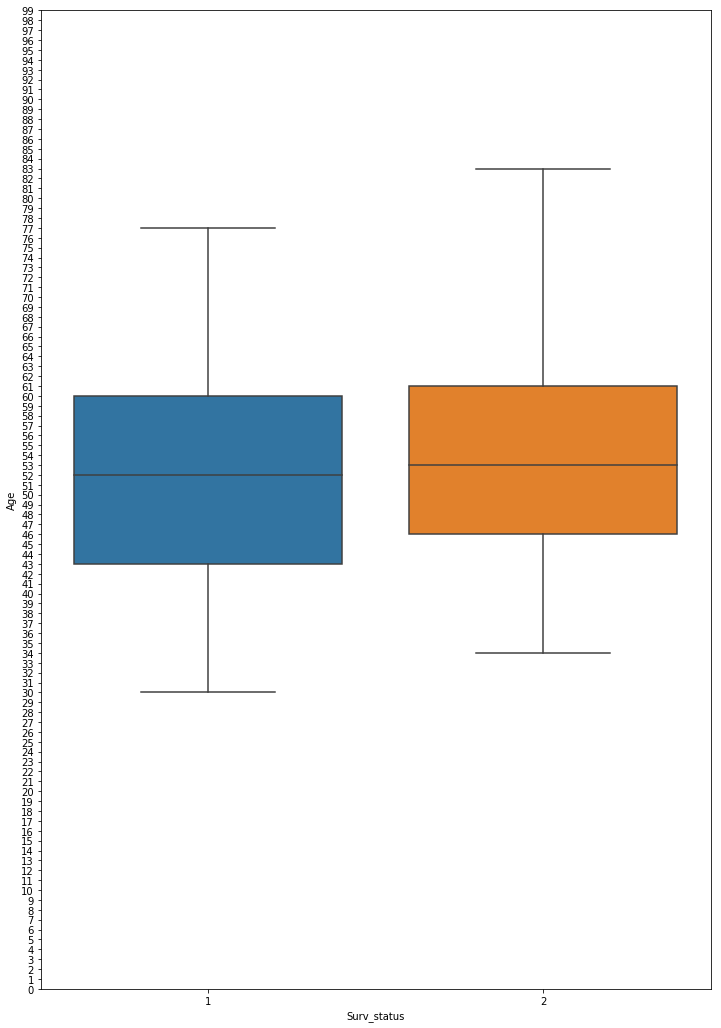

In [18]:
sns.boxplot(x='Surv_status',y='Age', data=haberman)
plt.yticks(np.arange(0, 100, 1))
plt.show()

When age is less than 46 the patient may live more than 5 years with error in prediction present as the box plots are overlapping and the amount of overlapping is 25 percent of 81 which is 20

[0.43478261 0.08115942 0.02898551 0.0173913  0.01449275 0.02028986
 0.0057971  0.0057971  0.00289855 0.0115942  0.00289855 0.00289855
 0.00289855 0.00289855 0.0057971  0.         0.00289855 0.
 0.00289855 0.00289855 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00289855]
[0.66666667 0.12444444 0.04444444 0.02666667 0.02222222 0.03111111
 0.00888889 0.00888889 0.00444444 0.01777778 0.00444444 0.00444444
 0.00444444 0.00444444 0.00888889 0.         0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00444444]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.4666

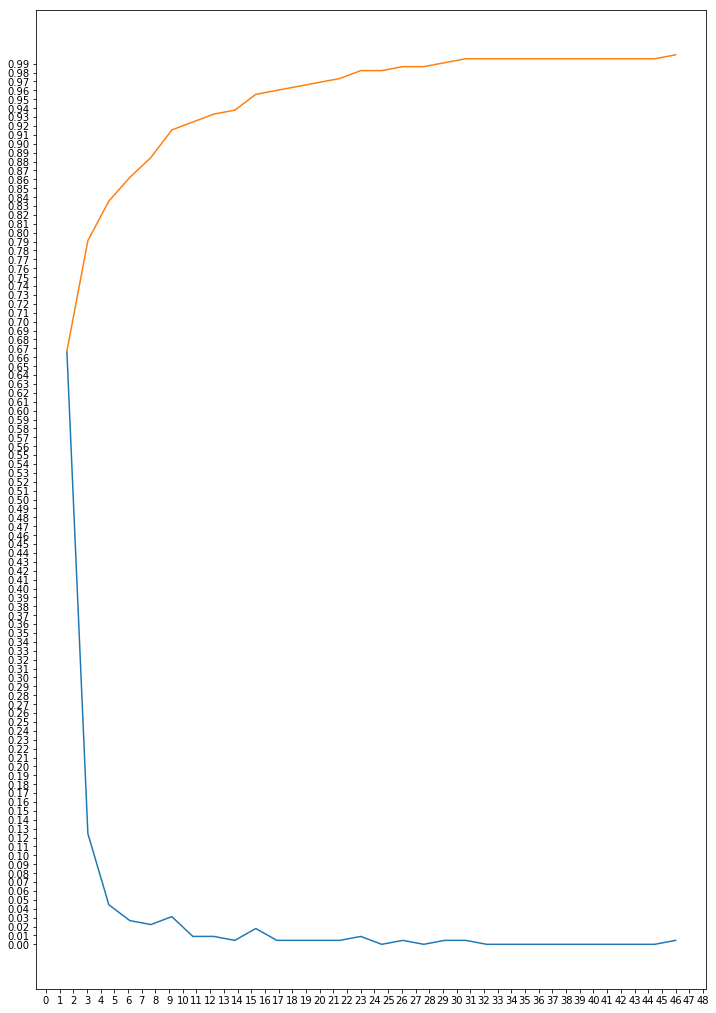

In [19]:
counts, bin_edges = np.histogram(haberman_1['axil_nodes_det'], bins=30, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
plt.xticks(np.arange(0, 100, 1))
plt.yticks(np.arange(0, 1,0.01))
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


It is noted from data that 66.5% of people have less than 3 axil_nodes_dent.
0.05 percent of people have highest number of 46 axil_nodes_dent.
They are able to survive.

[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin_edges [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


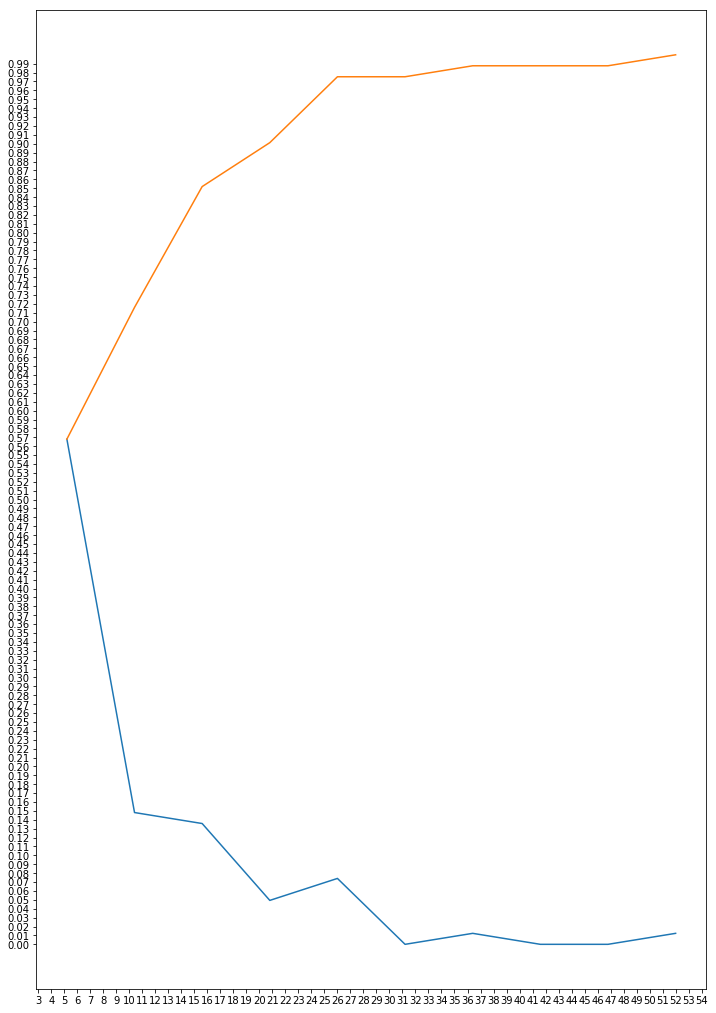

In [20]:
counts, bin_edges = np.histogram(haberman_2['axil_nodes_det'], bins=10, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
plt.xticks(np.arange(0, 100, 1))
plt.yticks(np.arange(0, 1,0.01))
print('bin_edges',bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




plt.show();

57% of people with less than 5 axil_nodes_dent are not able to survive for more than 5 years
and other ranges can be specified and their percentages can also be noted from the graph

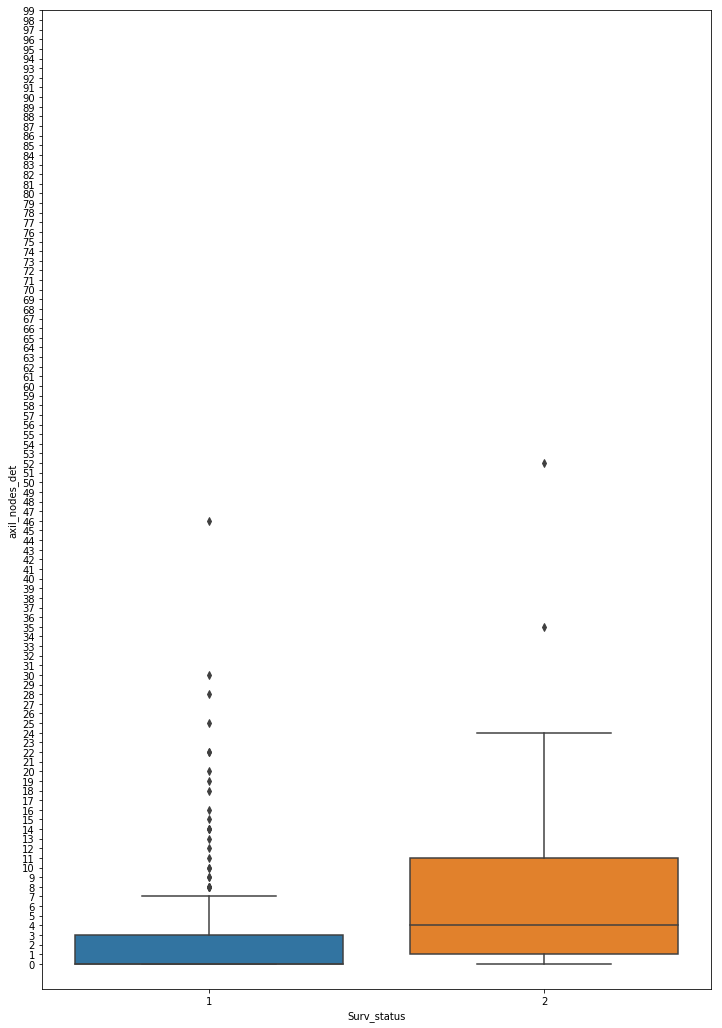

In [21]:
sns.boxplot(x='Surv_status',y='axil_nodes_det', data=haberman)
plt.yticks(np.arange(0, 100, 1))
plt.show()

There is 75 percentile probability that when axil_nodes_det are less than 3 the patient will live for more than 5 years ,of that there is a 50 percent chance of commiting error.
There are many outliers so we should be very careful 

In [22]:
print("\nMedians:")

print(np.median(haberman_1["axil_nodes_det"]))
print(np.median(haberman_2["axil_nodes_det"]))


print("\nQuantiles:")

print(np.percentile(haberman_1["axil_nodes_det"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["axil_nodes_det"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")

print(np.percentile(haberman_1["axil_nodes_det"],90))
print(np.percentile(haberman_2["axil_nodes_det"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")

print(robust.mad(haberman_1["axil_nodes_det"]))
print(robust.mad(haberman_2["axil_nodes_det"]))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


90 % of people having less than 8 axil_nodes_det survive for more than 5 years

In [23]:
print(np.mean(haberman_1["axil_nodes_det"]))
print(np.mean(haberman_2["axil_nodes_det"]))

2.7911111111111113
7.45679012345679


In [24]:
print(np.std(haberman_1["axil_nodes_det"]))
print(np.std(haberman_2["axil_nodes_det"]))

5.857258449412131
9.128776076761632


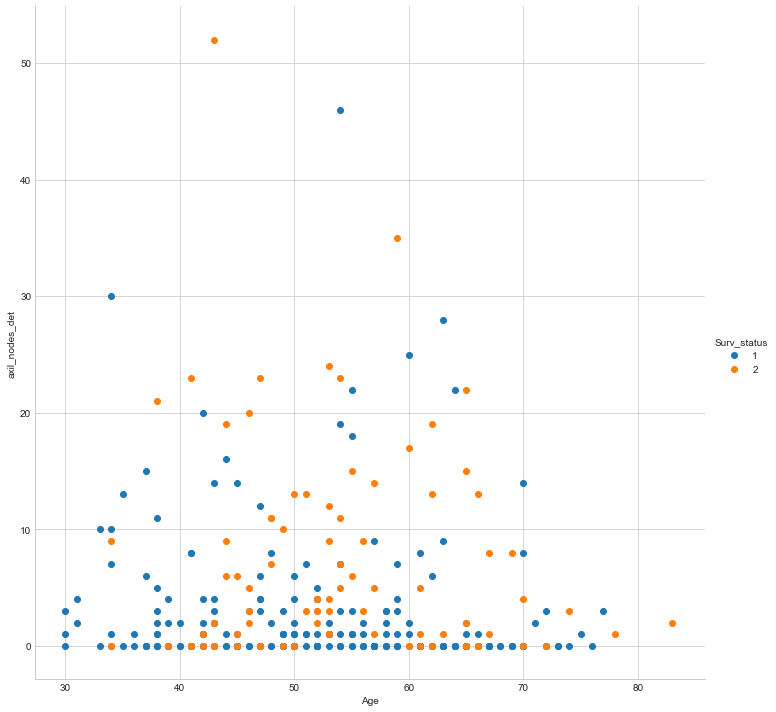

In [25]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=10) \
   .map(plt.scatter, "Age", "axil_nodes_det") \
   .add_legend();
plt.show();

Chances of surving for more than 5 increases if the axil_nodes_det is near to zero

In [26]:
print(len(haberman))
print(len(haberman_1))

306
225


In [27]:
print(haberman_1.head())

   Age  Op_Year  axil_nodes_det  Surv_status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1


In [28]:
haberman_1.reset_index(drop=True, inplace=True)

In [29]:
print(haberman_1.head())

   Age  Op_Year  axil_nodes_det  Surv_status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1


In [30]:
haberman_2.reset_index(drop=True, inplace=True)

In [31]:
print(haberman_2.head())

   Age  Op_Year  axil_nodes_det  Surv_status
0   34       59               0            2
1   34       66               9            2
2   38       69              21            2
3   39       66               0            2
4   41       60              23            2


In [32]:
i=0
count=0
for i in range(225):
 if(haberman_1.axil_nodes_det[i]==1):
       count=count+1
print(count)

33


In [33]:
i=0
count=0
for i in range(81):
 if(haberman_2.axil_nodes_det[i]==1):
       count=count+1
print(count)

8


the above numbers are the proofs that the when lower is the axil_nodes_det higher is the probability that the patient will live for more than 5 years

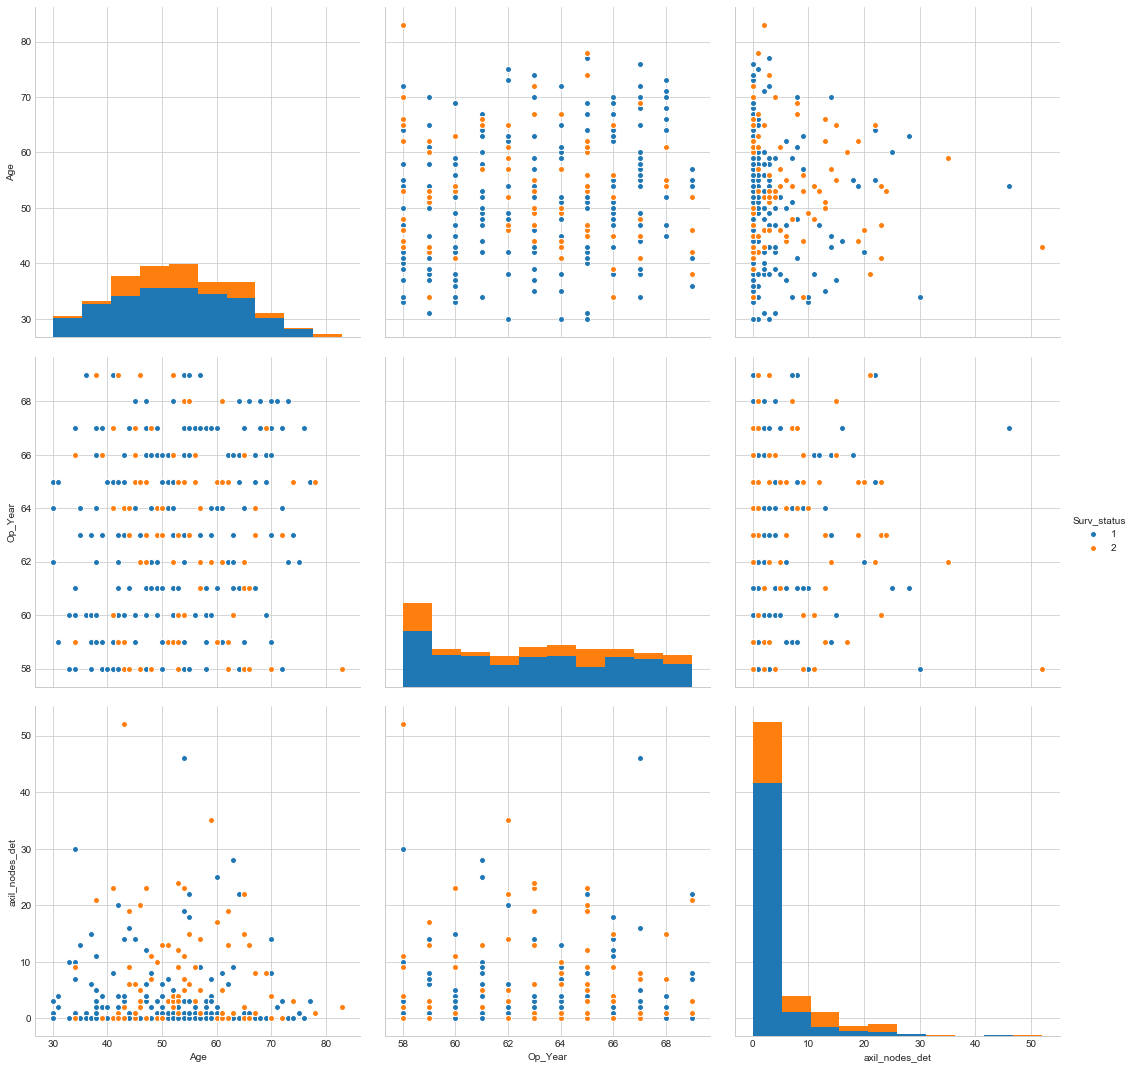

In [37]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status",vars=["Age", "Op_Year","axil_nodes_det"],size=5);
plt.show()

I am not able to any kind of classification

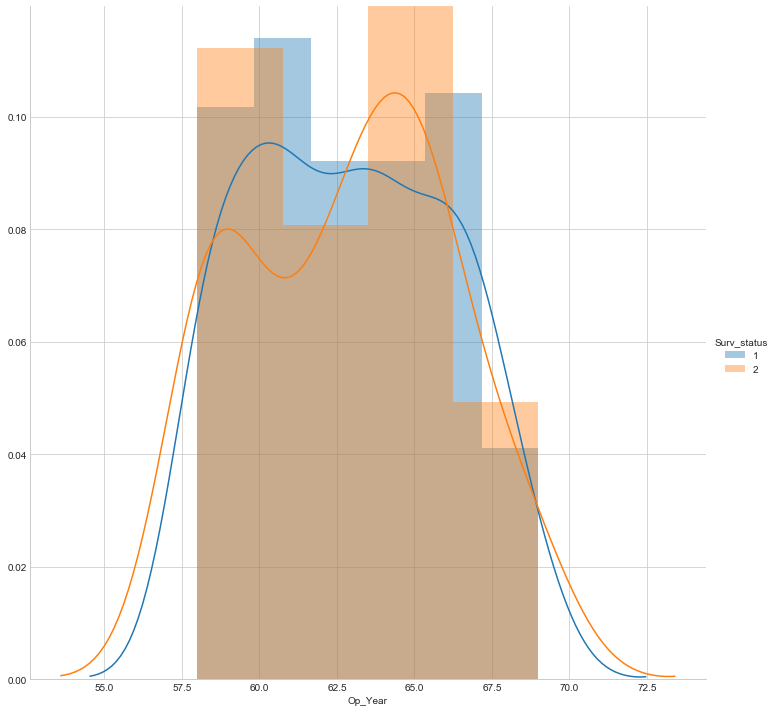

In [37]:
plt.close();
sns.FacetGrid(haberman, hue="Surv_status", size=10) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

I am not able to do any kind of classification

Conclusions:

1. Information about the dataset:
    
    It is a imbalanced dataset and 52% of the data are for patients below 52.

2. Insights from age of patients:    
    
    If age is less than 35 we can say that the patient can live 5 years or longer for sure.When age is less than 46  and above 30the patient may live more than 5 years with error in prediction present as the box plots are 
    overlapping and the amount of overlapping is 25 percent of 81 which is 20.
    It is found that people with age between 53 and 58 have high probability of living for more than 5 years 
    In other range of ages we can give only probalistic values and they are neither high nor low.

3. Insights from no of axil_det_nodes:
    
    As axil_nodes_det is in the range of 0-5,the patient will live for more than 5 years once the it crossed 10,the patient may not 
    live for mare than 5 years.
    It is noted from data that 66.5% of people have less than 3 axil_nodes_dent. 0.05 percent of people have highest number of 
    46 axil_nodes_dent. They are able to survive.
    There is 75 percentile probability that when axil_nodes_det are less than 3 the patient will live for more than 5 years ,
    of that there is a 50 percent chance of commiting error. There are many outliers so we should be very careful
    90 % of people having less than 8 axil_nodes_det survive for more than 5 years
    Chances of surving for more than 5 increases if the axil_nodes_det is near to zero
